In [3]:
emissionssw <- read.table("emissionssw.dat",header=TRUE)
n <- nrow(emissionssw)

In [4]:
summary(emissionssw)

      nox            noxem              ws            humidity       
 Min.   :  1.2   Min.   : 102.5   Min.   : 0.100   Min.   :0.009332  
 1st Qu.: 47.7   1st Qu.: 675.0   1st Qu.: 1.033   1st Qu.:0.060673  
 Median : 88.3   Median :2183.6   Median : 1.667   Median :0.100842  
 Mean   :116.0   Mean   :2250.7   Mean   : 2.087   Mean   :0.171872  
 3rd Qu.:152.5   3rd Qu.:3741.7   3rd Qu.: 2.750   3rd Qu.:0.168508  
 Max.   :694.5   Max.   :5362.1   Max.   :11.367   Max.   :4.099019  

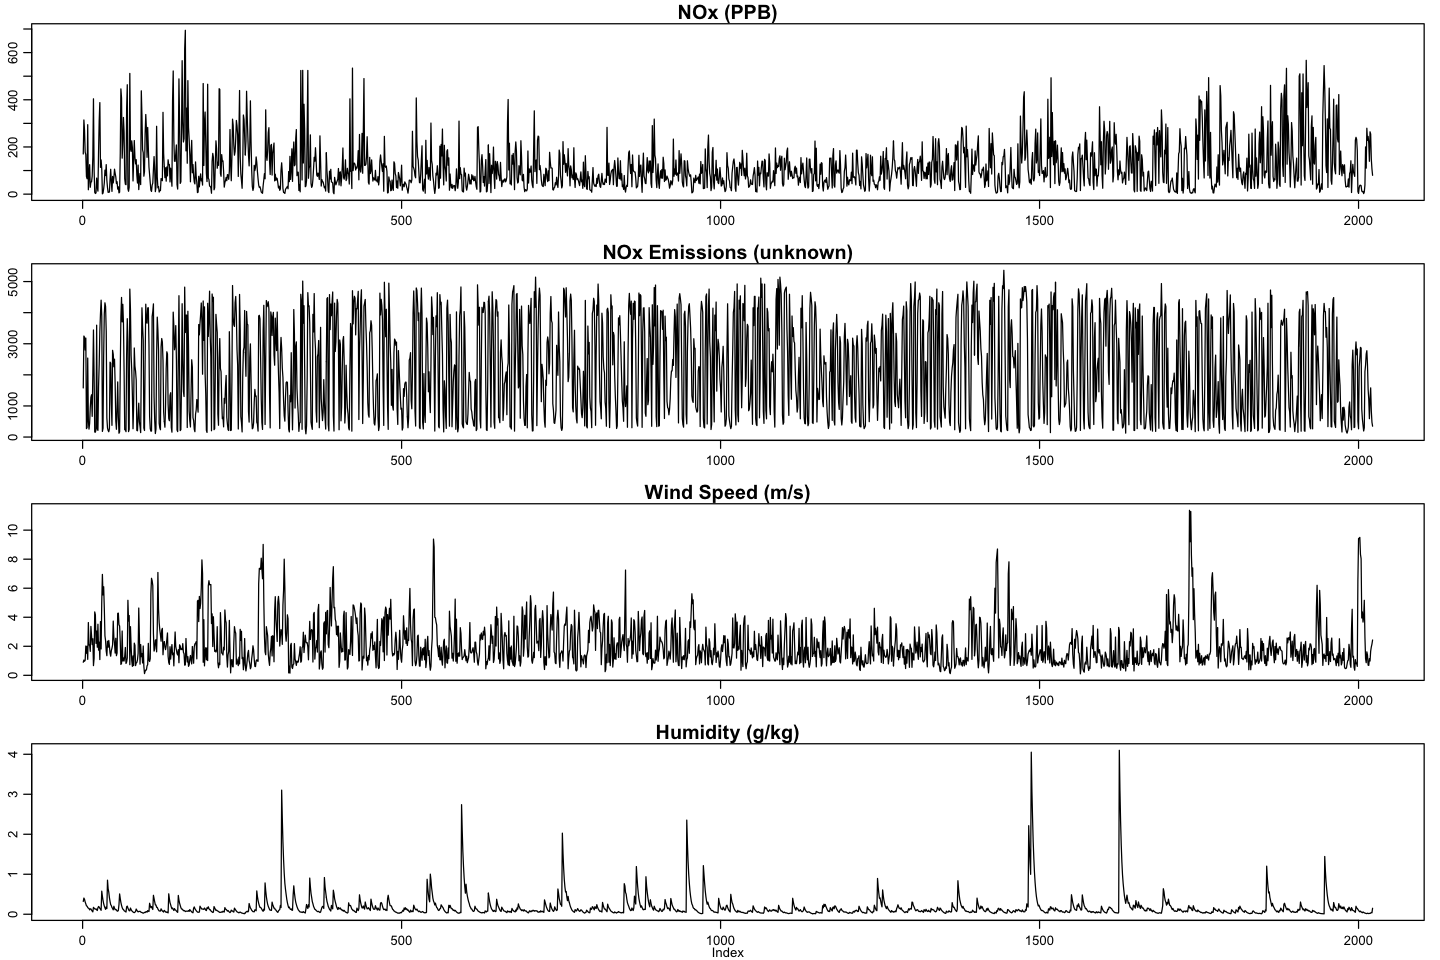

In [5]:
with(options(repr.plot.width = 12, repr.plot.height = 8), {
    par(pin = c(20, 20), mfrow = c(4, 1), mar = c(2.5, 2, 1.5, 1), mgp = c(1.5, 0.7, 0))
    par(cex.lab = 1, cex.axis = 1, cex.main = 1.5, cex.sub = 1.2)
    plot(emissionssw$nox, type = 'l', main = 'NOx (PPB)', xlab = '', ylab = '')
    plot(emissionssw$noxem, type = 'l', main = 'NOx Emissions (unknown)', xlab = '', ylab = '')
    plot(emissionssw$ws, type = 'l', main = 'Wind Speed (m/s)', xlab = '', ylab = '')
    plot(emissionssw$humidity, type = 'l',  main = 'Humidity (g/kg)', xlab = 'Index', ylab = '')
})

In [6]:
cor(emissionssw)

nox         noxem       ws          humidity   
nox       1.00000000  0.51758582 -0.34754186 -0.04739774
noxem     0.51758582  1.00000000  0.11653505 -0.03381921
ws       -0.34754186  0.11653505  1.00000000  0.01722212
humidity -0.04739774 -0.03381921  0.01722212  1.00000000

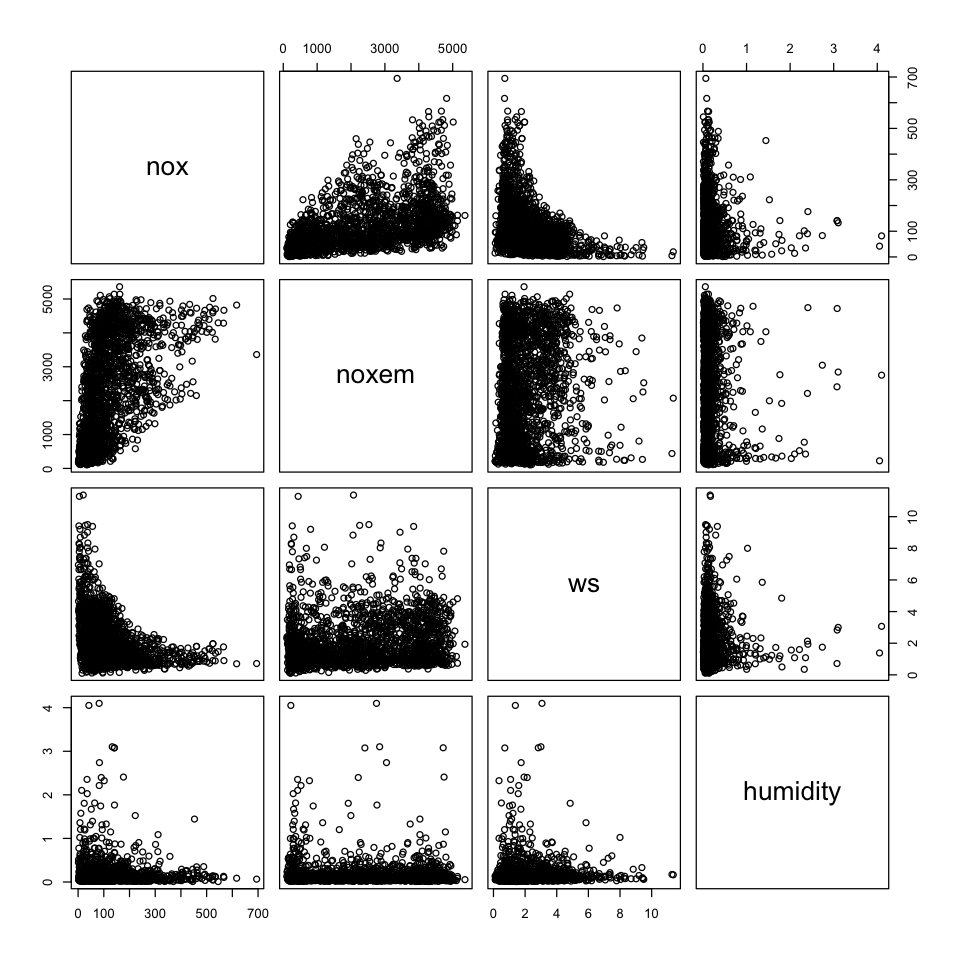

In [7]:
with(options(repr.plot.width = 8, repr.plot.height = 8), {pairs(emissionssw)})

In [8]:
emissionssw.transformed <- data.frame(
    log.nox = log(emissionssw$nox),
    log.noxem = log(emissionssw$noxem),
    ws = emissionssw$ws,
    ws_log.noxem = emissionssw$ws * log(emissionssw$noxem),
    cos = cos(seq(0, 2 * pi, length.out = n))
)

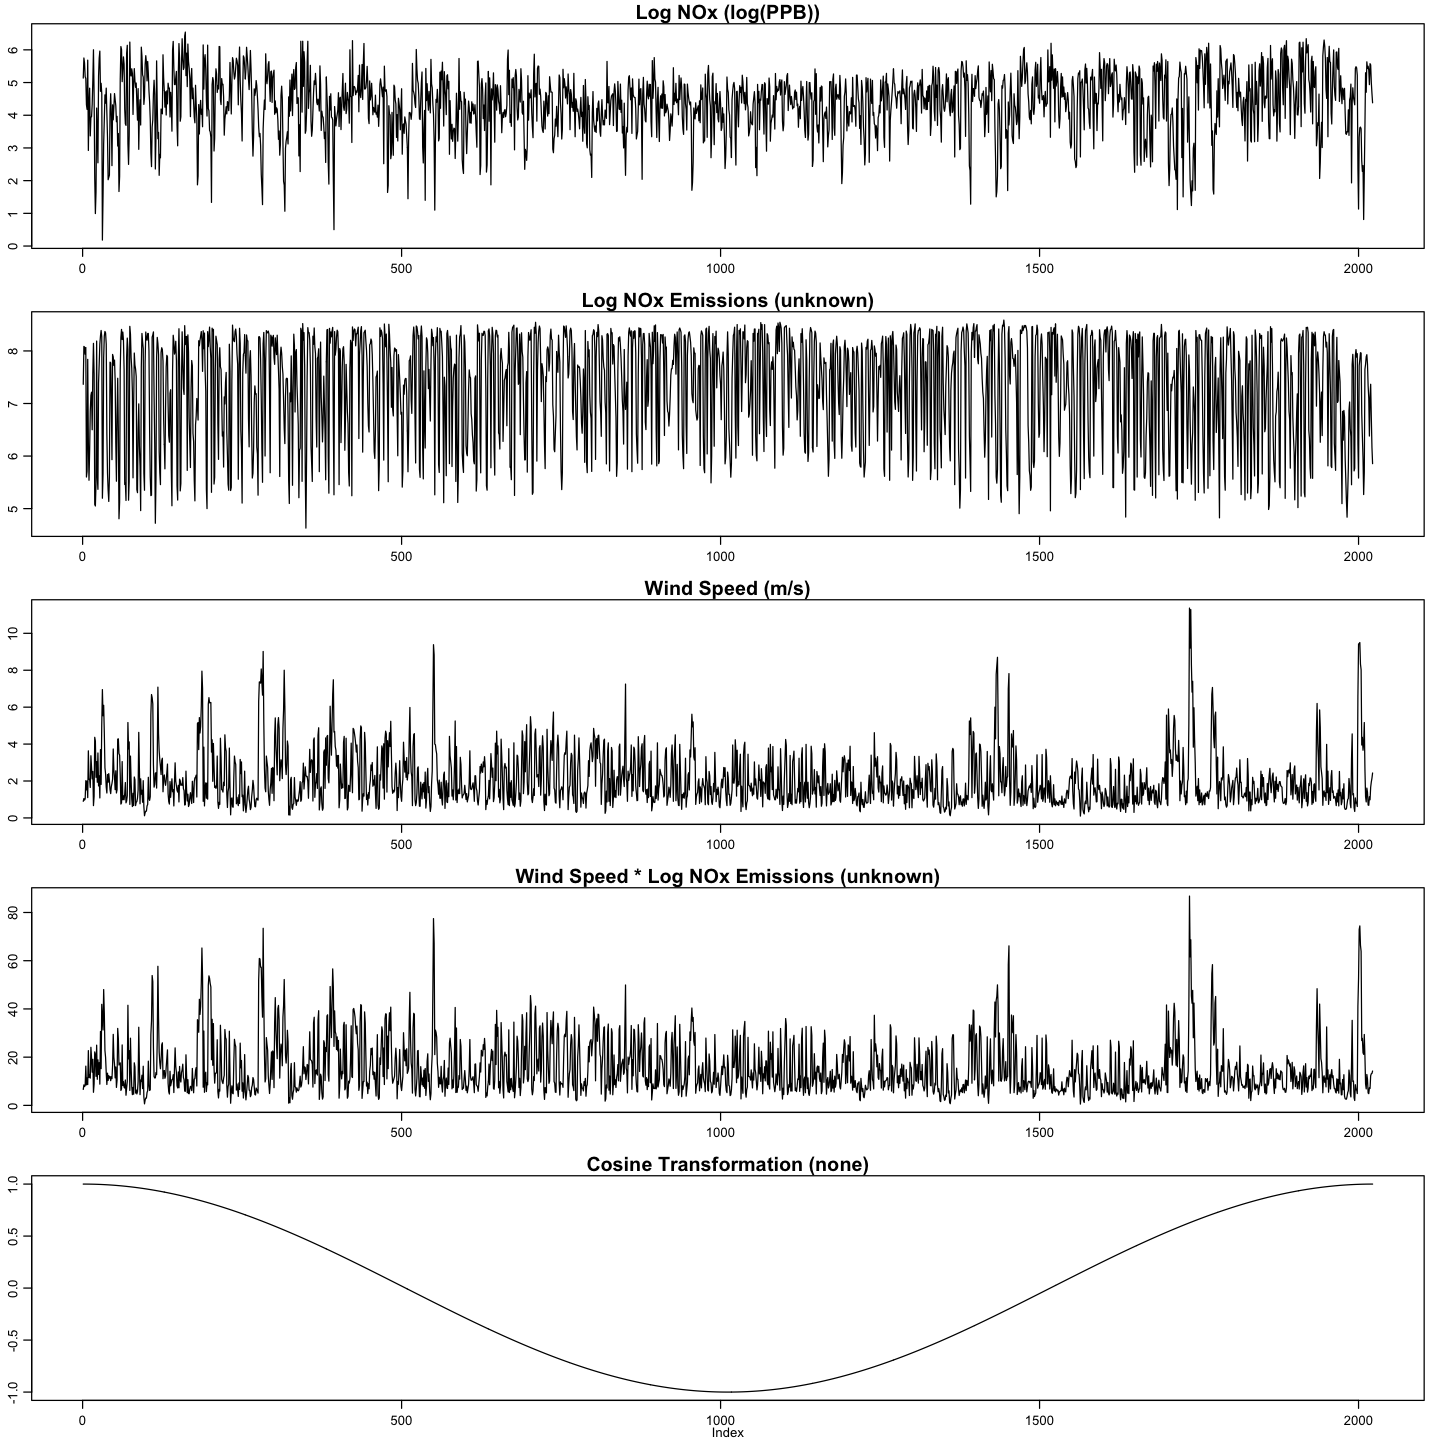

In [9]:
with(options(repr.plot.width = 12, repr.plot.height = 12), {
    par(pin = c(20, 20), mfrow = c(5, 1), mar = c(2.5, 2, 1.5, 1), mgp = c(1.5, 0.7, 0))
    par(cex.lab = 1, cex.axis = 1, cex.main = 1.5, cex.sub = 1.2)
    plot(emissionssw.transformed$log.nox, type = 'l', main = 'Log NOx (log(PPB))', xlab = '', ylab = '')
    plot(emissionssw.transformed$log.noxem, type = 'l', main = 'Log NOx Emissions (unknown)', xlab = '', ylab = '')
    plot(emissionssw.transformed$ws, type = 'l', main = 'Wind Speed (m/s)', xlab = '', ylab = '')
    plot(emissionssw.transformed$ws_log.noxem, type = 'l',  main = 'Wind Speed * Log NOx Emissions (unknown)', xlab = '', ylab = '')
    plot(emissionssw.transformed$cos, type = 'l', main = 'Cosine Transformation (none)', xlab = 'Index', ylab = '')
})

In [10]:
summary(emissionssw.transformed)

    log.nox         log.noxem           ws          ws_log.noxem    
 Min.   :0.1823   Min.   :4.630   Min.   : 0.100   Min.   : 0.5362  
 1st Qu.:3.8649   1st Qu.:6.515   1st Qu.: 1.033   1st Qu.: 7.3668  
 Median :4.4807   Median :7.689   Median : 1.667   Median :11.5093  
 Mean   :4.3844   Mean   :7.337   Mean   : 2.087   Mean   :15.4658  
 3rd Qu.:5.0272   3rd Qu.:8.227   3rd Qu.: 2.750   3rd Qu.:20.9508  
 Max.   :6.5432   Max.   :8.587   Max.   :11.367   Max.   :86.8051  
      cos            
 Min.   :-0.9999988  
 1st Qu.:-0.7068313  
 Median : 0.0007772  
 Mean   : 0.0004946  
 3rd Qu.: 0.7079300  
 Max.   : 1.0000000  

In [11]:
cor(emissionssw.transformed)

log.nox    log.noxem  ws          ws_log.noxem cos        
log.nox       1.0000000  0.6364005 -0.43374077 -0.28979383   0.11641074
log.noxem     0.6364005  1.0000000  0.10332354  0.28046275  -0.13782892
ws           -0.4337408  0.1033235  1.00000000  0.97513062   0.05175993
ws_log.noxem -0.2897938  0.2804628  0.97513062  1.00000000   0.01405774
cos           0.1164107 -0.1378289  0.05175993  0.01405774   1.00000000

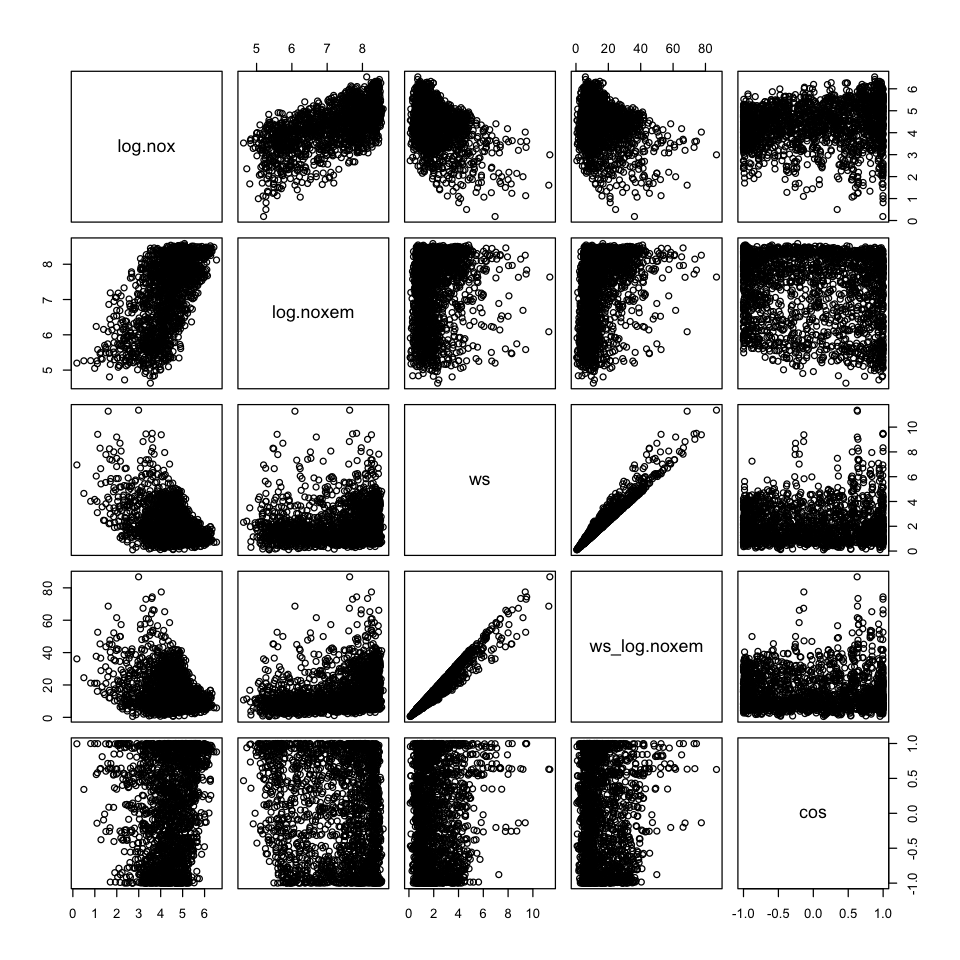

In [12]:
with(options(repr.plot.width = 8, repr.plot.height = 8), {pairs(emissionssw.transformed)})

In [13]:
analyze_model <- function(model){
    print(summary(model))
    par(mfrow = c(2, 2))
    plot(model, which = 1:4, qqline = TRUE, add.smooth = FALSE)
    par(mfrow = c(1, 1))
}

analyze_model_iterative <- function(formula, data, max_iter = 100) {
    model <<- lm(formula, data = data)
    for (i in 1:max_iter) {
        model <- lm(formula, data = data, weights = 1/abs(residuals(model)))
    }
    print(summary(model))
    par(mfrow = c(2, 2))
    plot(model, which = 1:4, qqline = TRUE, add.smooth = FALSE)
    par(mfrow = c(1, 1))
    return(model)
}

loov <- function(formula, data){
    y_preds <- numeric(0)
    for (i in 1:nrow(data)){
        model <- lm(formula, data = data[-i,])
        y_preds[i] <- predict(model, newdata = data[i, ])
    }
    return(data.frame(y_true = data[as.character(formula)[2]], y_preds = y_preds))
}

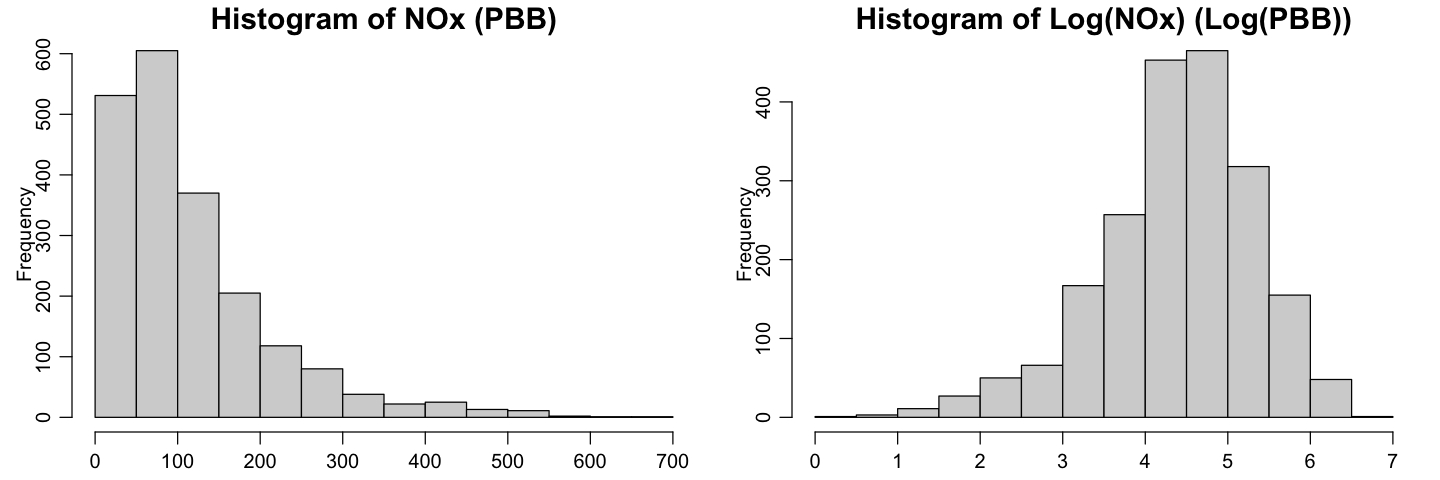

In [14]:
with(options(repr.plot.width = 12, repr.plot.height = 4), {
    par(pin = c(20, 20), mfrow = c(1, 2), mar = c(2, 3, 1.5, 1), mgp = c(1.5, 0.7, 0))
    par(cex.lab = 1, cex.axis = 1, cex.main = 1.5, cex.sub = 1.2)
    hist(emissionssw$nox, main = 'Histogram of NOx (PBB)', xlab = '', ylab = 'Frequency')
    hist(emissionssw.transformed$log.nox, main = 'Histogram of Log(NOx) (Log(PBB))', xlab = '', ylab = 'Frequency')
})


Call:
lm(formula = nox ~ noxem + ws + humidity, data = emissionssw)

Residuals:
    Min      1Q  Median      3Q     Max 
-166.19  -42.65  -15.38   20.03  500.14 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  92.947559   3.699776  25.122   <2e-16 ***
noxem         0.036152   0.001077  33.573   <2e-16 ***
ws          -27.338040   1.113436 -24.553   <2e-16 ***
humidity     -7.227542   5.705300  -1.267    0.205    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 73.89 on 2018 degrees of freedom
Multiple R-squared:  0.437,	Adjusted R-squared:  0.4361 
F-statistic: 522.1 on 3 and 2018 DF,  p-value: < 2.2e-16



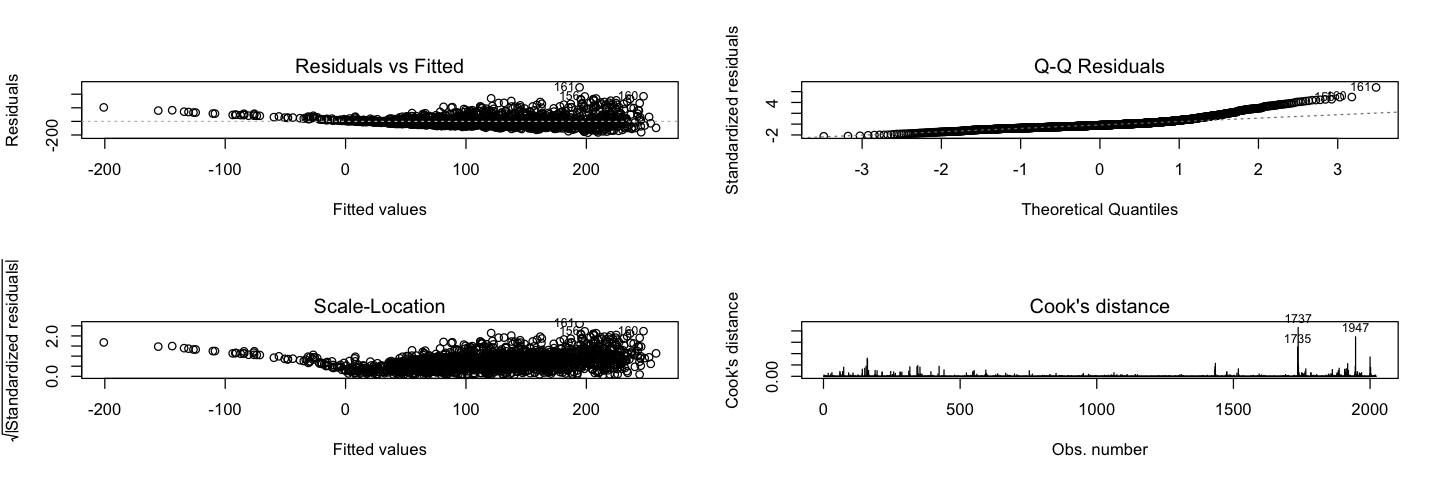

In [15]:
# Baseline linear model with all covariates
baseline_model <- lm(nox ~ noxem + ws + humidity, data=emissionssw)
loov_baseline <- loov(nox ~ noxem + ws + humidity, data=emissionssw)
analyze_model(baseline_model)


Call:
lm(formula = log.nox ~ log.noxem + ws + cos + ws_log.noxem, data = emissionssw.transformed)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.97983 -0.29920  0.04903  0.31879  1.77914 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.013775   0.139058    7.29 4.42e-13 ***
log.noxem     0.553072   0.018978   29.14  < 2e-16 ***
ws           -0.775998   0.056208  -13.81  < 2e-16 ***
cos           0.335390   0.015886   21.11  < 2e-16 ***
ws_log.noxem  0.060279   0.007554    7.98 2.44e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4976 on 2017 degrees of freedom
Multiple R-squared:  0.7237,	Adjusted R-squared:  0.7231 
F-statistic:  1320 on 4 and 2017 DF,  p-value: < 2.2e-16



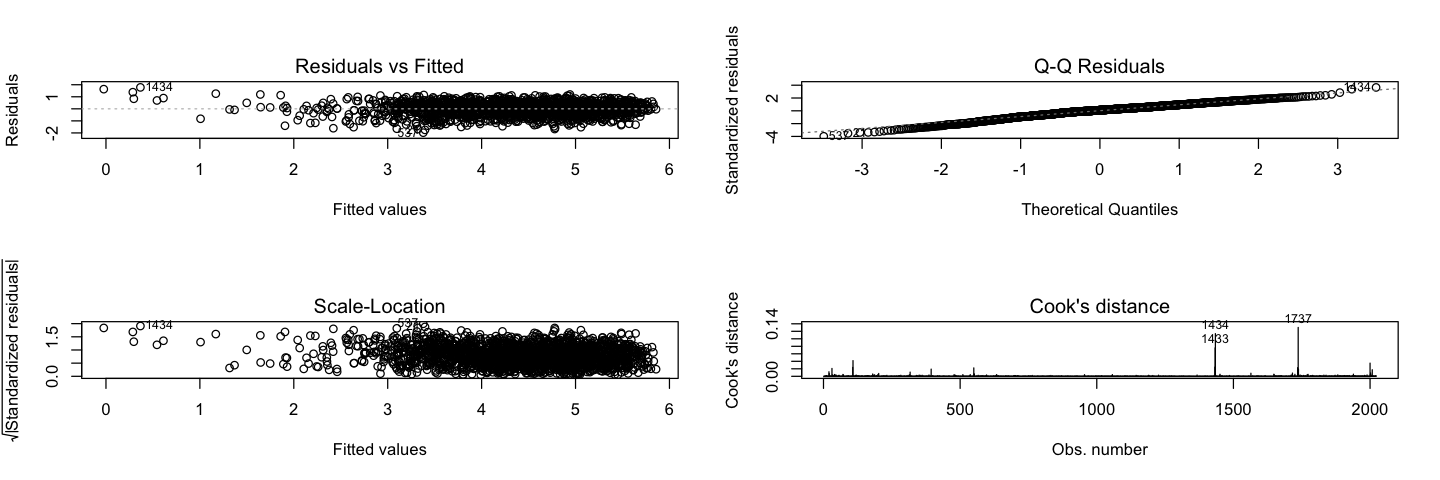

In [16]:
# Transformed model with interactions and time-series features
rejected_model <- lm(log.nox ~ log.noxem + ws + cos + ws_log.noxem, data=emissionssw.transformed)
loov_rejected<- loov(log.nox ~ log.noxem + ws + cos + ws_log.noxem, data=emissionssw.transformed)
analyze_model(rejected_model)


Call:
lm(formula = log.nox ~ log.noxem + ws, data = emissionssw.transformed)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09712 -0.32843 -0.00142  0.35002  1.43815 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.337195   0.090484   3.727 0.000199 ***
log.noxem    0.643011   0.012234  52.561  < 2e-16 ***
ws          -0.321170   0.008334 -38.540  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5539 on 2019 degrees of freedom
Multiple R-squared:  0.6572,	Adjusted R-squared:  0.6569 
F-statistic:  1935 on 2 and 2019 DF,  p-value: < 2.2e-16



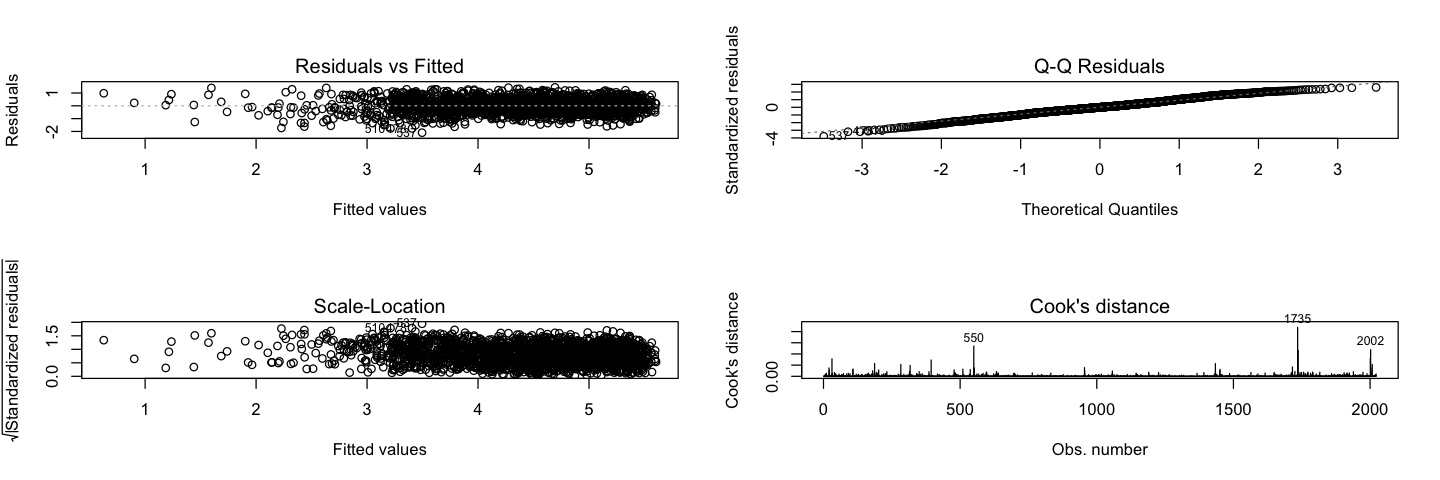

In [17]:
# Recommended simplistic model
recommended_model <- lm(log.nox ~ log.noxem + ws, data=emissionssw.transformed)
loov_rejected <- loov(log.nox ~ log.noxem + ws,  data=emissionssw.transformed)
analyze_model(recommended_model)

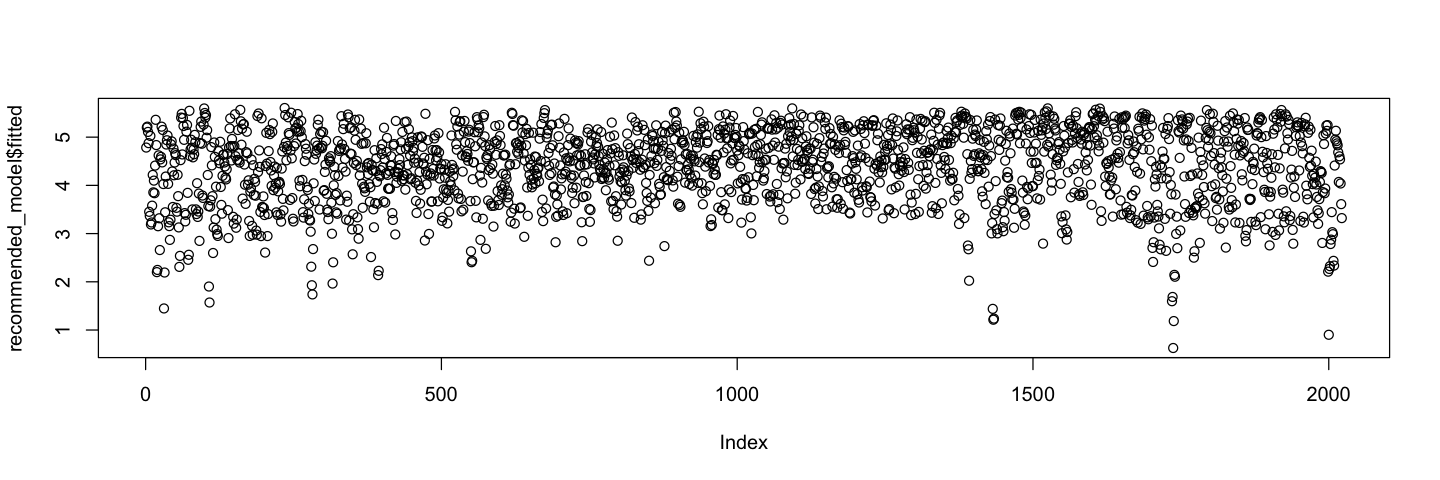

In [18]:
plot(recommended_model$fitted)

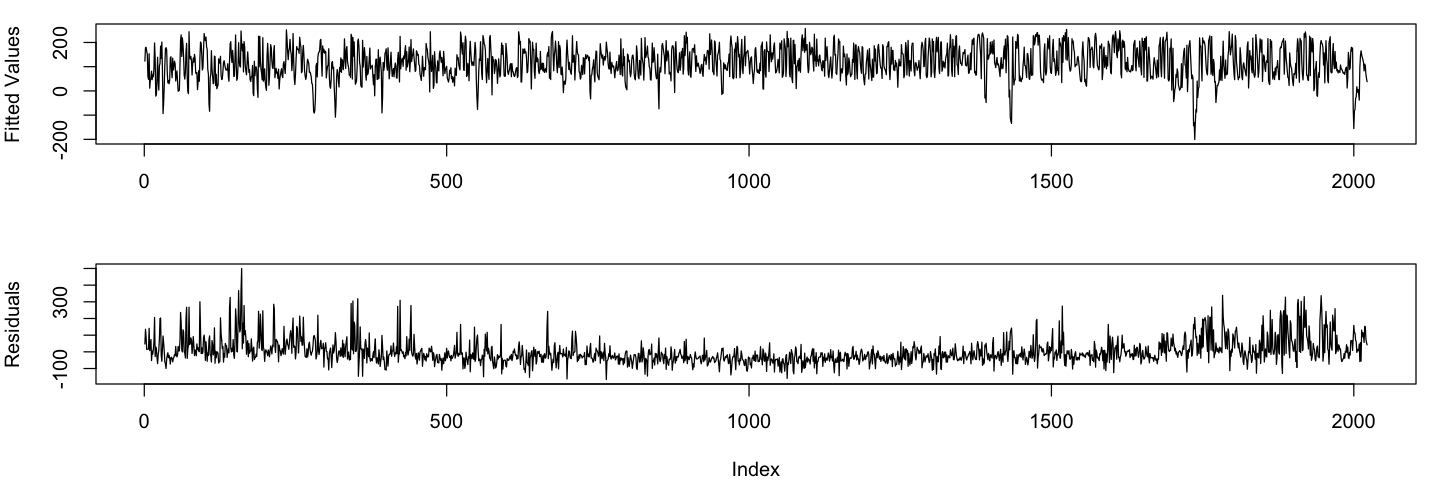

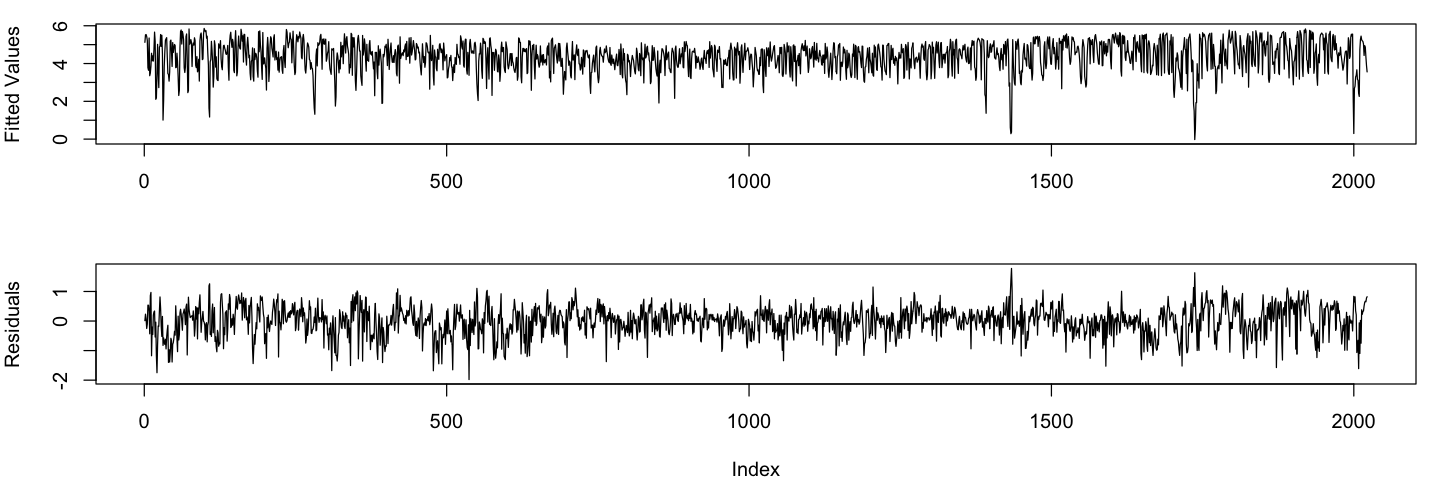

$baseline
NULL

$rejected
NULL

$recommended
NULL

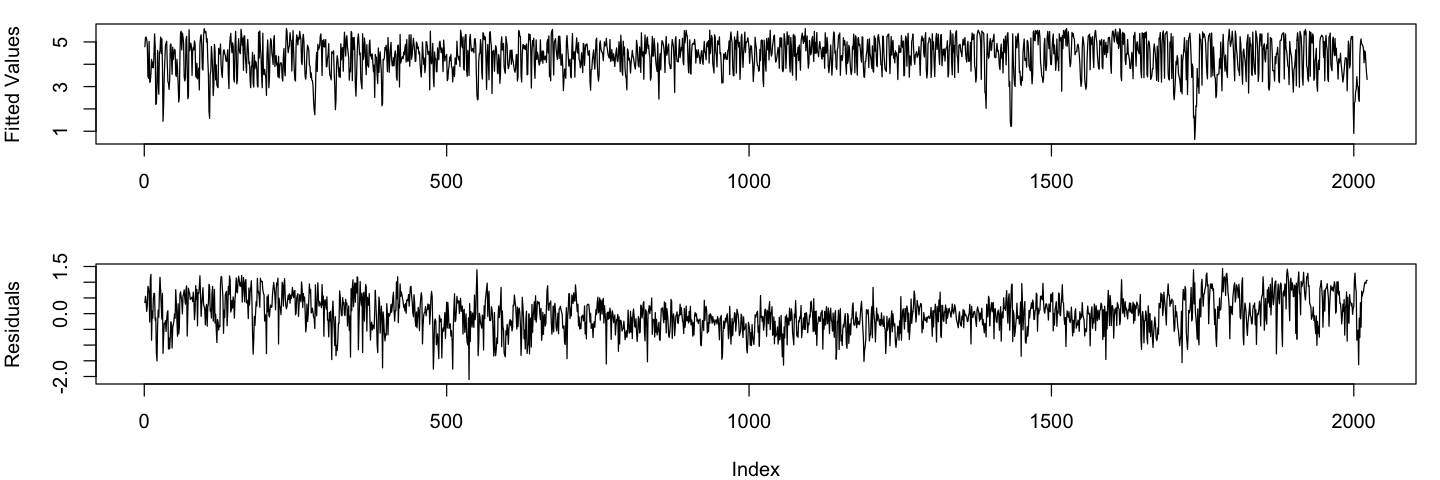

In [27]:
plot_residuals_over_time <- function(model) {
  par(mfrow=c(2, 1), mar=c(4,4,1,1))
  plot(model$fitted.values, type='l', ylab='Fitted Values', xlab='')
  plot(model$residuals, type='l', ylab='Residuals', xlab='Index')
}

models_list <- list(baseline=baseline_model, rejected=rejected_model, recommended=recommended_model);
lapply(models_list, plot_residuals_over_time);

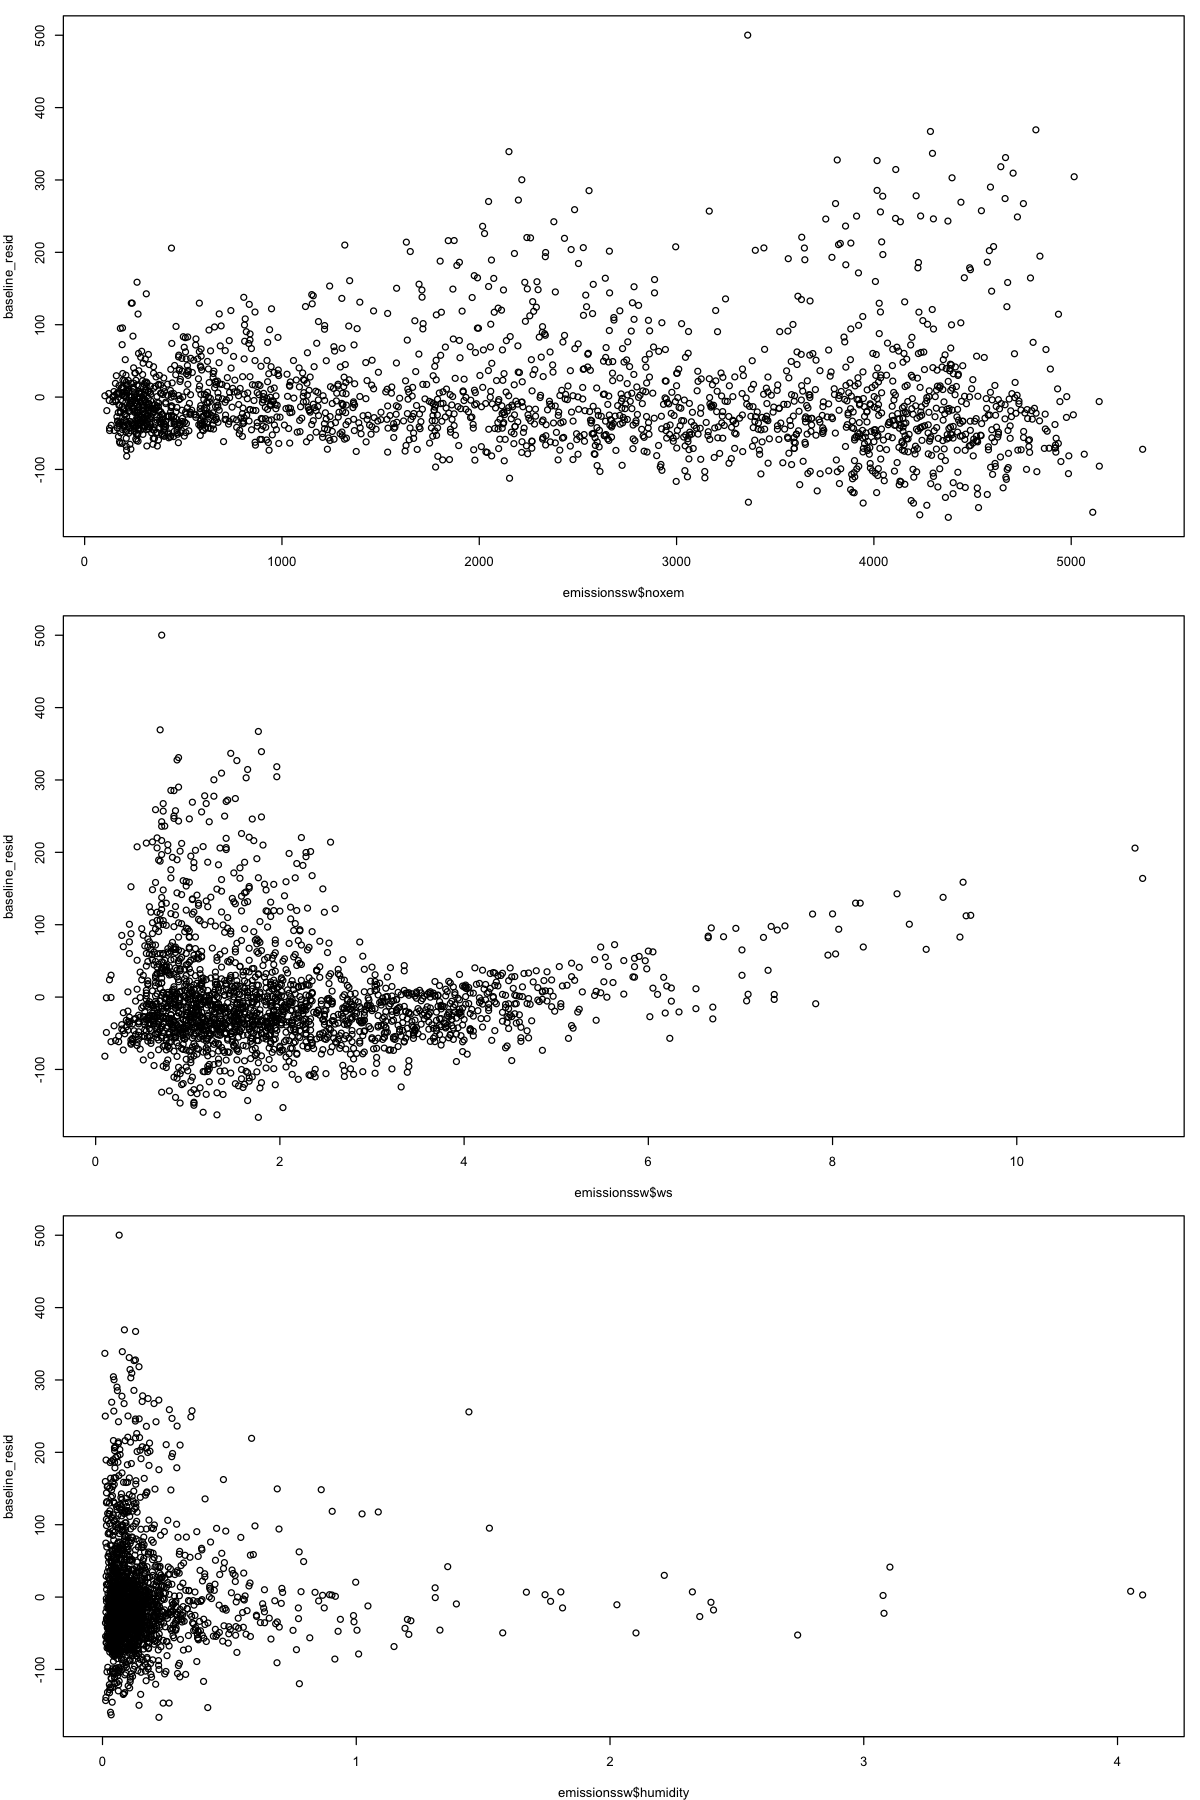

In [38]:
baseline_resid = baseline_model$residuals
with(options(repr.plot.width = 10, repr.plot.height = 15), {
    par(mfrow=c(3, 1), mar=c(4,4,1,1))
    plot(emissionssw$noxem, baseline_resid)
    plot(emissionssw$ws, baseline_resid)
    plot(emissionssw$humidity, baseline_resid)
})

In [ ]:
emi

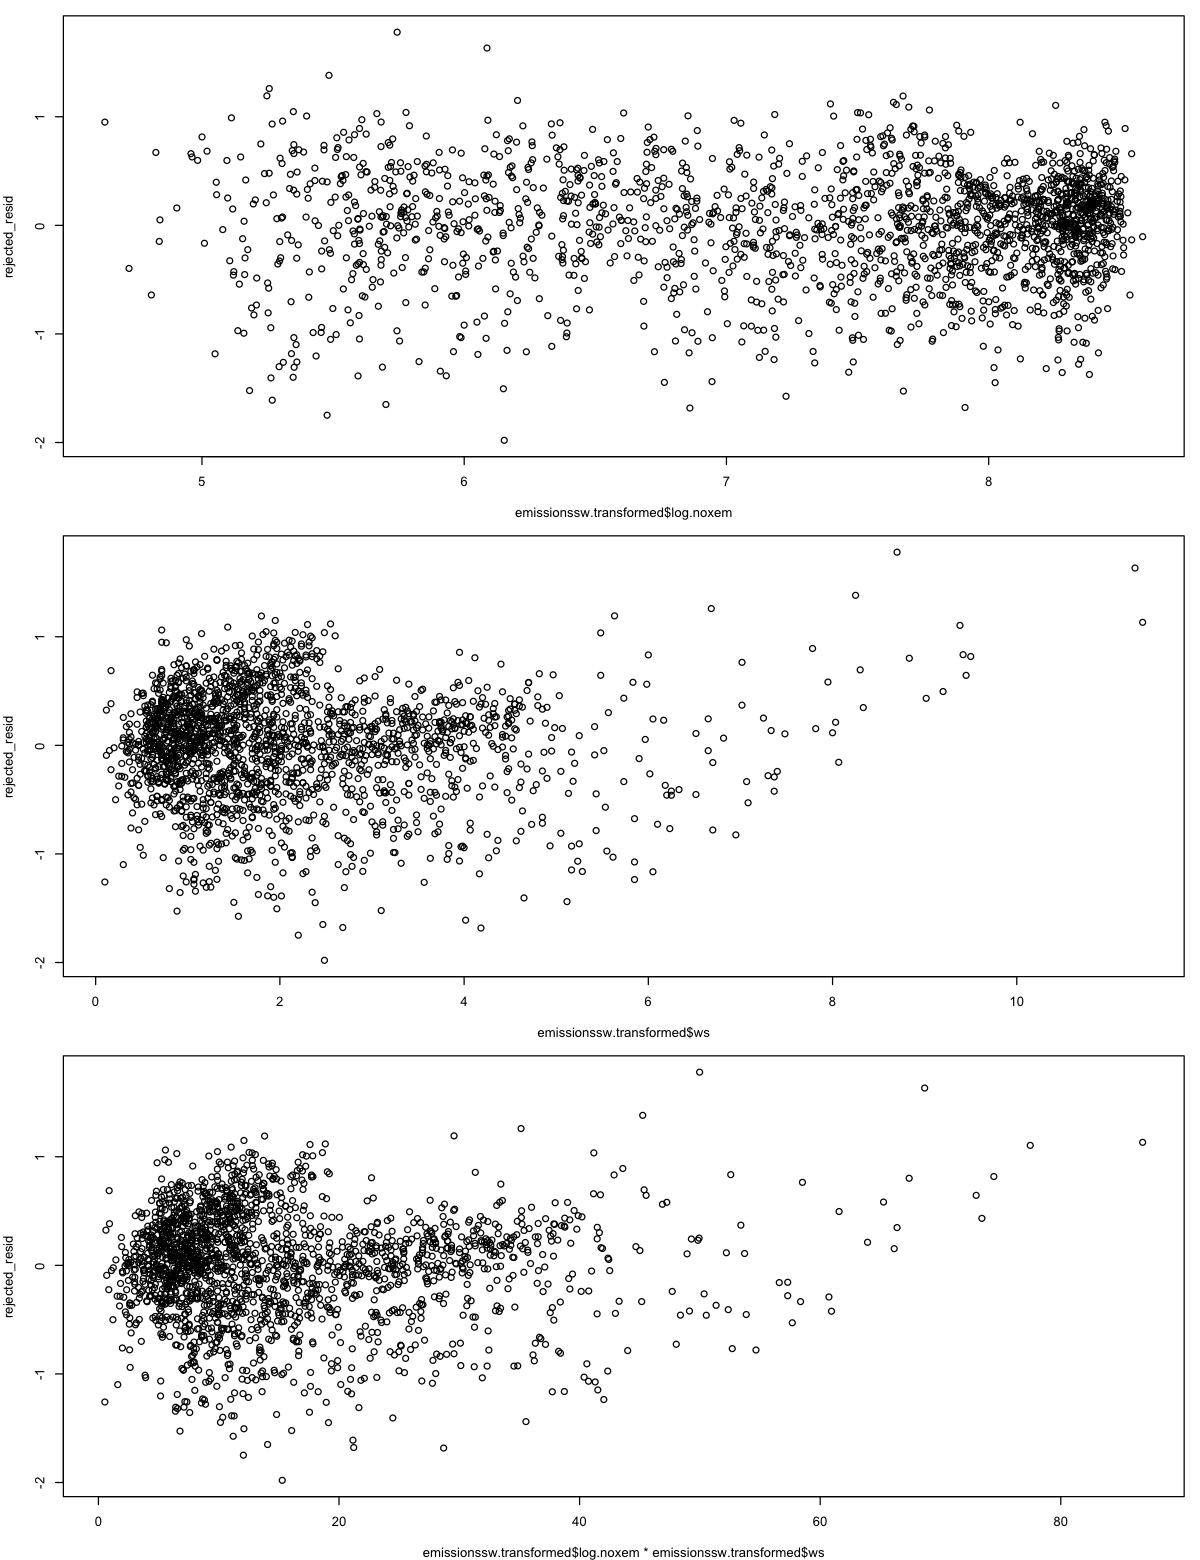

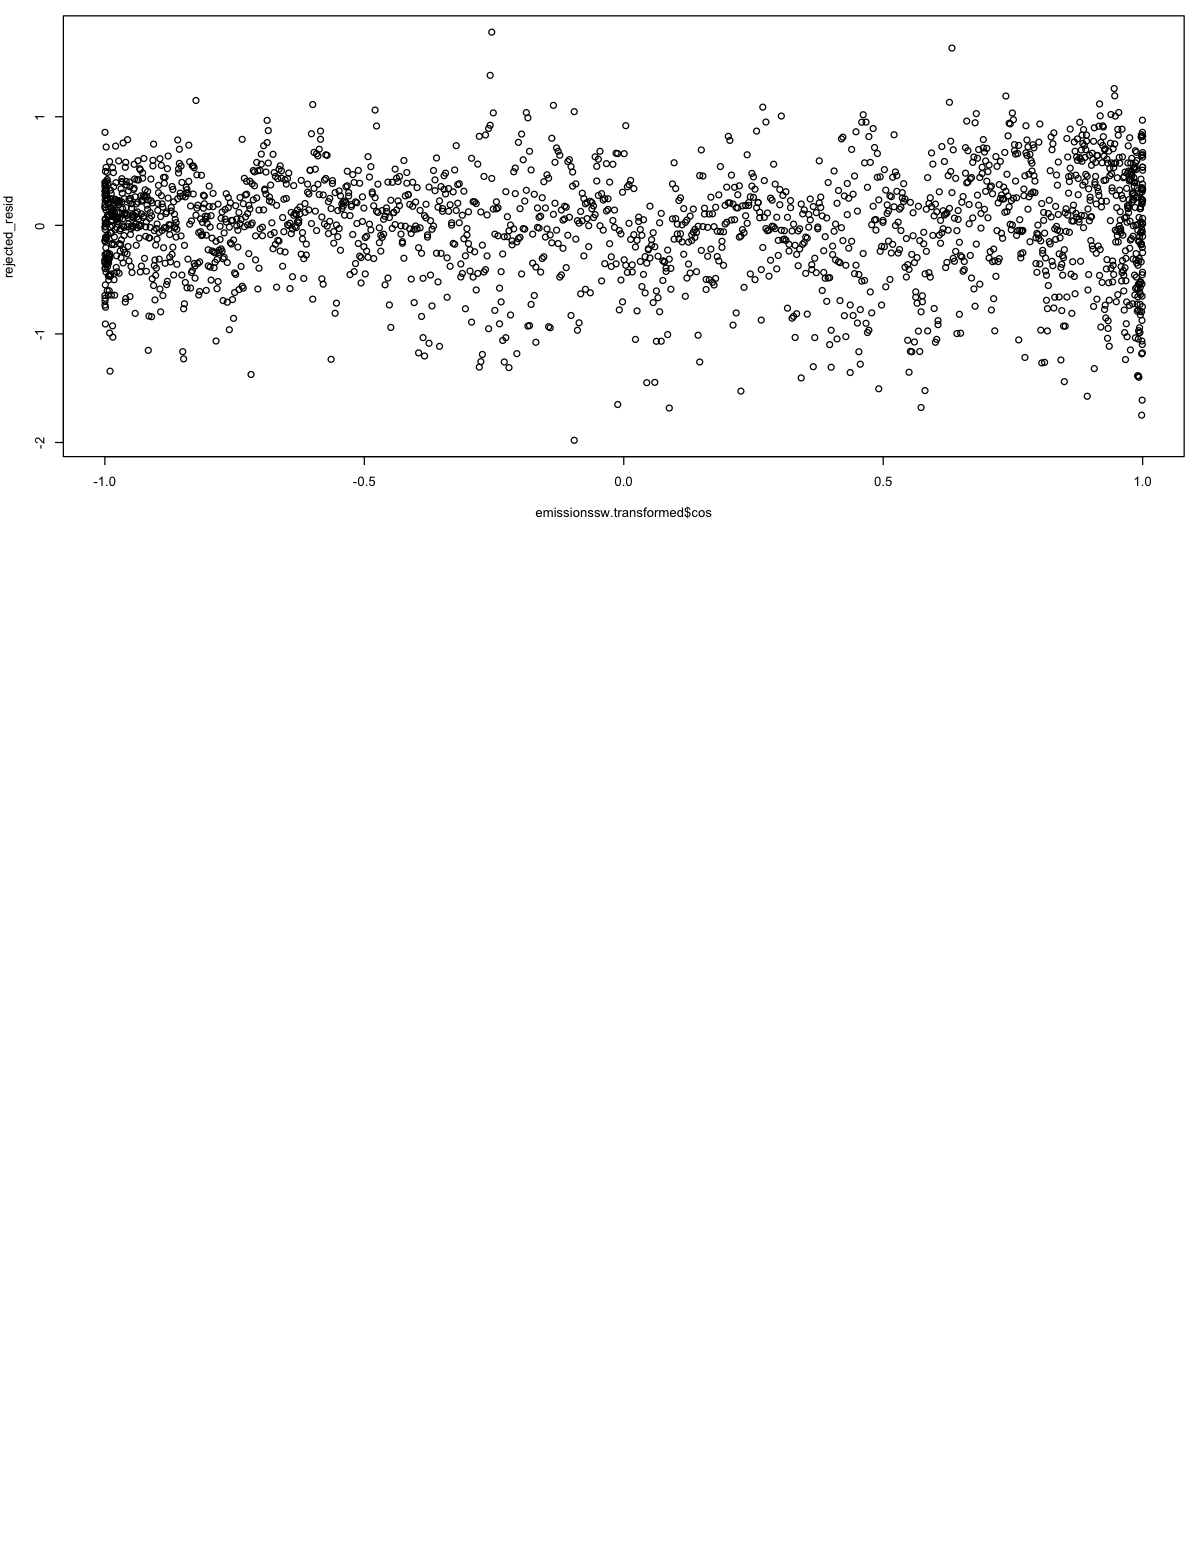

In [50]:
rejected_resid = rejected_model$residuals
with(options(repr.plot.width = 10, repr.plot.height = 13), {
    par(mfrow=c(3, 1), mar=c(4,4,1,1))
    plot(emissionssw.transformed$log.noxem, rejected_resid)
    plot(emissionssw.transformed$ws, rejected_resid)
    plot(emissionssw.transformed$log.noxem * emissionssw.transformed$ws, rejected_resid)
    plot(emissionssw.transformed$cos, rejected_resid)
})

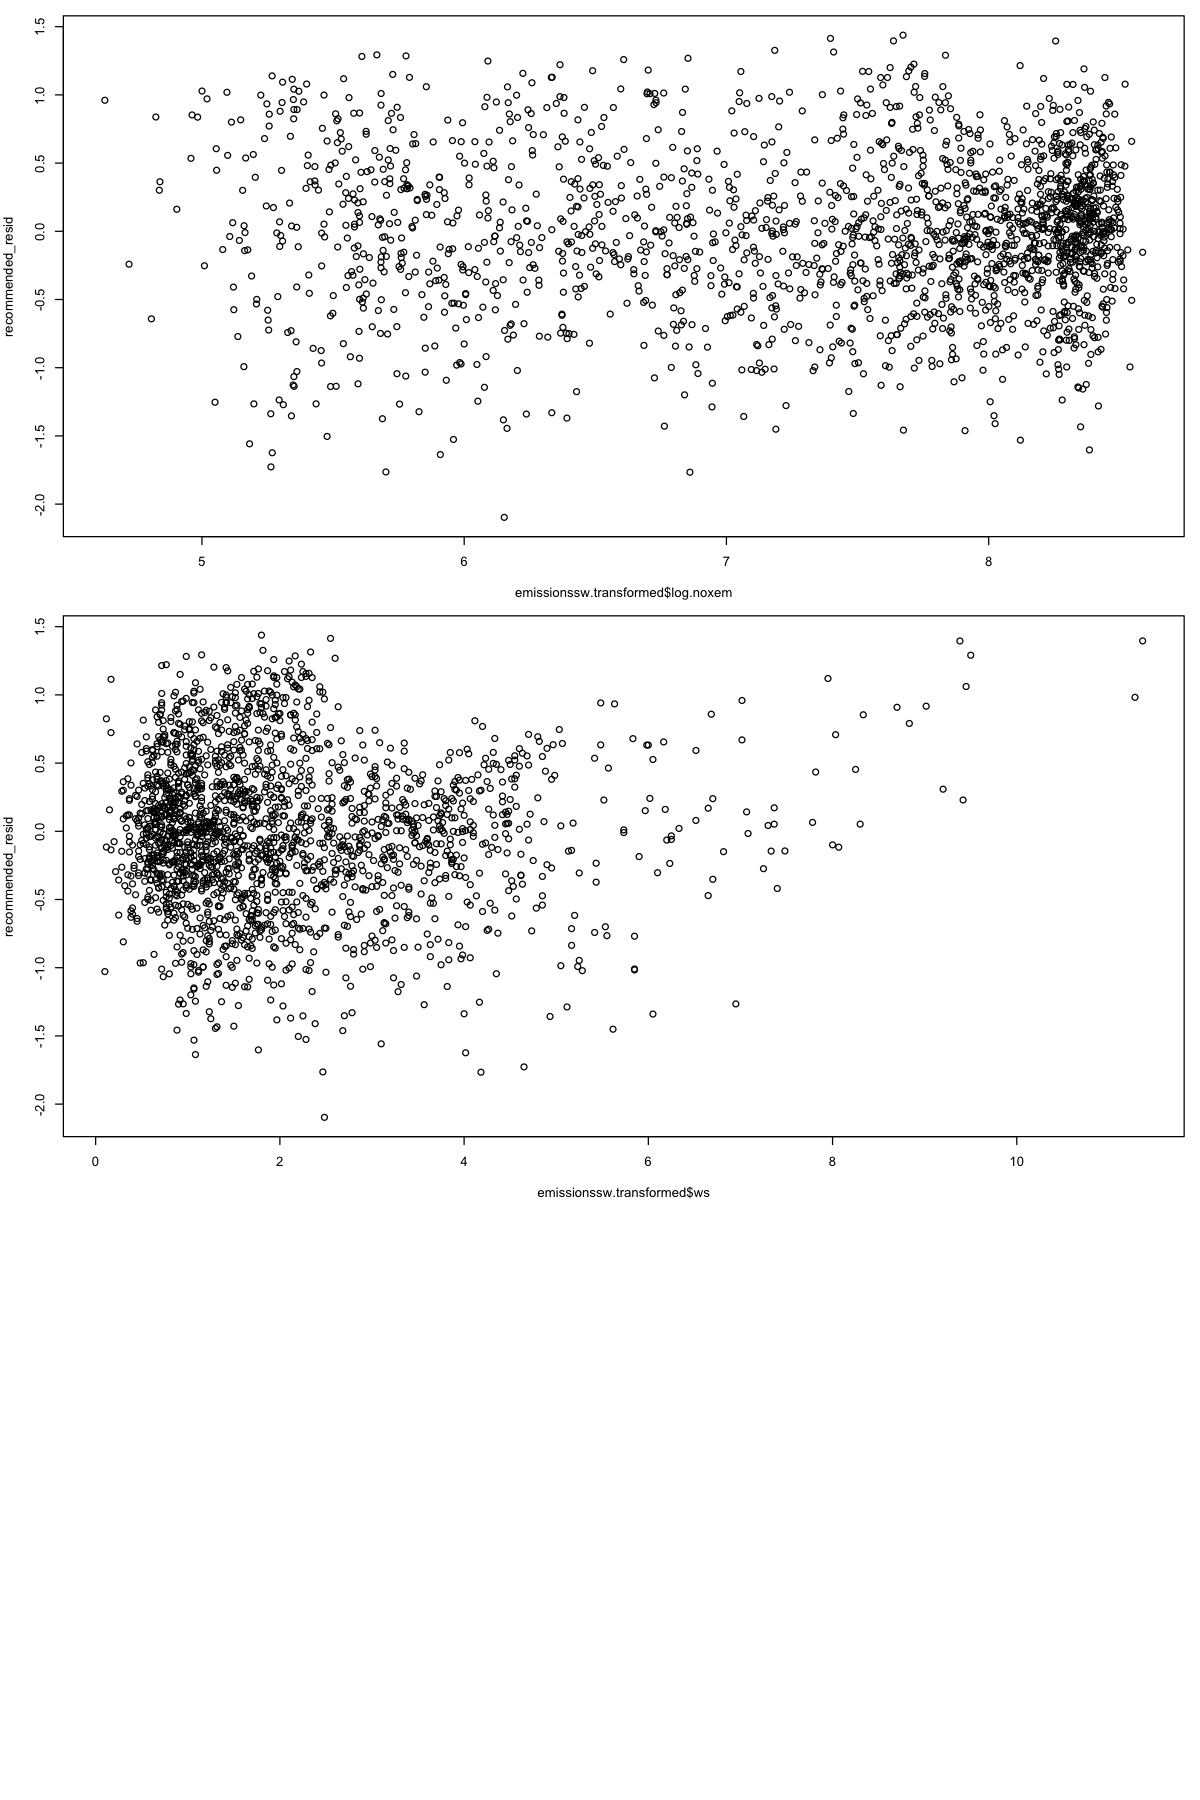

In [42]:
recommended_resid = recommended_model$residuals
with(options(repr.plot.width = 10, repr.plot.height = 15), {
    par(mfrow=c(3, 1), mar=c(4,4,1,1))
    plot(emissionssw.transformed$log.noxem, recommended_resid)
    plot(emissionssw.transformed$ws, recommended_resid)
})

In [54]:
b <- coef(recommended_model)
V <- vcov(recommended_model)

tibble::tibble(
  diff_estim = b[2] - b[3],
  diff_SE = sqrt(V[2, 2] + V[3, 3] - 2 * V[2, 3]),
  t_stat = diff_estim / diff_SE,
  df = df.residual(recommended_model),
  p_value = 2 * pt(abs(t_stat), df = df, lower.tail = FALSE)
)

diff_estim diff_SE    t_stat   df   p_value
log.noxem 0.9641813  0.01549772 62.21439 2019 0

In [58]:
library("robustbase")
recommended_model_robust <- lmrob(log.nox ~ log.noxem + ws, data=emissionssw.transformed)
summary(recommended_model_robust)


Call:
lmrob(formula = log.nox ~ log.noxem + ws, data = emissionssw.transformed)
 \--> method = "MM"
Residuals:
     Min       1Q   Median       3Q      Max 
-2.11955 -0.34288 -0.00513  0.34079  1.43415 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.415625   0.109069   3.811 0.000143 ***
log.noxem    0.632483   0.014670  43.113  < 2e-16 ***
ws          -0.317636   0.009714 -32.699  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Robust residual standard error: 0.525 
Multiple R-squared:  0.6492,	Adjusted R-squared:  0.6488 
Convergence in 12 IRWLS iterations

Robustness weights: 
 190 weights are ~= 1. The remaining 1832 ones are summarized as
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06623 0.84950 0.95220 0.89680 0.98590 0.99900 
Algorithmic parameters: 
       tuning.chi                bb        tuning.psi        refine.tol 
        1.548e+00         5.000e-01         4.685e+00         1.000e-07 
         